# Q2: Multiple Regression

Introduction to Data Science (DS-GA1001)

Code by: Stephen Spivack (ss7726@nyu.edu), Pascal Wallisch (pascalwallisch@nyu.edu)

Date: 10-28-22

#### Import libraries

In [86]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#### Ingest data

In [87]:
df_orig = pd.read_csv('movieReplicationSet.csv')


In [88]:
df_orig

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I cheer or shout or talk or curse at the screen,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,NaN,NaN,4.0,NaN,3.0,NaN,NaN,NaN,NaN,NaN,...,1.0,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1
1,NaN,NaN,1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.0,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0
3,NaN,NaN,2.0,NaN,3.0,NaN,NaN,NaN,NaN,4.0,...,3.0,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1
4,NaN,NaN,3.5,NaN,0.5,NaN,0.5,1.0,NaN,0.0,...,2.0,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,NaN,NaN,NaN,NaN,3.5,NaN,NaN,NaN,NaN,NaN,...,3.0,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0
1093,3.0,4.0,NaN,NaN,4.0,4.0,2.5,NaN,3.5,3.5,...,5.0,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0
1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,NaN,NaN,...,6.0,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0
1095,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1


In [89]:
print(len(df_orig.columns))     # 477 without 'mean', 478 with 'mean'

477


In [90]:
# creates a dictionary of the mean value of each column
def make_column_means(M):
    column_means = {}
    
    for col in M.columns:
        colmean = M[col].mean()
        column_means[str(col)] = colmean

    return column_means
    

In [91]:
def append_rowmeans(M):
    df_with_row_mean = M
    df_with_row_mean['mean'] = M.mean(axis=1)
    return df_with_row_mean

In [92]:
# value = df.at[0, 'a']  #nan
# isNaN = np.isnan(value)

# replace nans 
# first gets all of the column means
# then makes a new column for the rowmean
# for a given nan, replace it with the average of its rowmean and its colmean
def enrich_nans(M):
    
    column_means = make_column_means(M)
    M = append_rowmeans(M)
    
    # for every column
    for col in M.columns:

        for row in range(len(M)):
            value = M.at[row, col]

            if np.isnan(value):
                rowmean = M.at[row, 'mean']
                colmean = column_means[col]
                newvalue = (rowmean + colmean) / 2

#                 print("rowmean: %s, colmean: %s ==> NEW: %s" % (rowmean, colmean, newvalue))
                M.at[row, col] = newvalue
                
    return M


In [93]:
cols = df_orig.columns.tolist()
b_cols = cols[400:]
rating_cols = cols[:400]


In [94]:
# get a dataframe of the movies only
df_r = df_orig[rating_cols]

In [95]:
# add a placeholder for the new column
df_r['mean'] = np.nan

/var/folders/c7/k2fcvfxj5610zmlmq4sn39z00000gn/T/ipykernel_16664/2452103844.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_r['mean'] = np.nan


In [96]:
# do the missing value handling as described in the doc
df_r = enrich_nans(df_r)
df_r

/var/folders/c7/k2fcvfxj5610zmlmq4sn39z00000gn/T/ipykernel_16664/1223366756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_row_mean['mean'] = M.mean(axis=1)


,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,The Usual Suspects (1995),The Mask (1994),Jaws (1975),Harry Potter and the Chamber of Secrets (2002),Patton (1970),Anaconda (1997),Twister (1996),MacArthur (1977),Look Who's Talking (1989),mean
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,2.921947,2.650951,4.000000,0.500000,2.510773,2.519156,2.572578,2.428806,2.540410,2.742857
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,2.914154,2.643159,2.673112,4.000000,2.502981,2.511364,2.564786,2.421013,2.532618,2.727273
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,3.207926,2.936930,2.966883,3.500000,2.796752,2.805135,2.858557,2.714784,2.826389,3.314815
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,3.000000,2.486840,2.516793,2.500000,2.346661,2.355044,2.408466,2.264694,2.376299,2.414634
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,2.683993,3.000000,2.442950,2.769704,2.272819,2.281202,1.500000,2.190852,2.302456,2.266949
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,3.150518,2.879523,2.909476,4.000000,2.739344,2.747727,2.801149,2.657377,2.768981,3.200000
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,3.387353,4.000000,3.500000,3.500000,4.000000,3.500000,4.000000,4.000000,4.000000,3.673669
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.116783,2.845788,2.875741,4.000000,2.705609,2.713992,2.767414,2.623642,2.735247,3.132530
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,3.245831,2.974835,3.004788,2.500000,2.834657,2.843040,2.896462,2.752690,2.864294,3.390625


In [97]:
# also do this for the behavioral data
df_b = df_orig[b_cols]

In [98]:
# add a placeholder for the new column
df_b['mean'] = np.nan

/var/folders/c7/k2fcvfxj5610zmlmq4sn39z00000gn/T/ipykernel_16664/2095043677.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_b['mean'] = np.nan


In [99]:
df_b

,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,...,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),mean
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,...,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1,NaN
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,...,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0,NaN
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0,NaN
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,...,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1,NaN
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0,NaN
1093,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,...,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0,NaN
1094,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,...,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0,NaN
1095,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,...,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1,NaN


In [100]:
df_b = enrich_nans(df_b)
df_b

/var/folders/c7/k2fcvfxj5610zmlmq4sn39z00000gn/T/ipykernel_16664/1223366756.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_with_row_mean['mean'] = M.mean(axis=1)


,I enjoy driving fast,I enjoy rollercoasters,Have you ever bungee-jumped?,I enjoy impulse shopping,I sometimes go out on weeknights even if I have work to do,I enjoy doing things without too much planning,Have you ever been rock climbing?,I enjoy being in large loud crowds like the Times Square Ball Drop on New Years Eve,I enjoy going to large music or dance festivals,I enjoy watching horror movies,...,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),mean
0,5.0,5.0,2.0,5.0,1.0,2.0,3.0,1.0,4.0,1.0,...,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1,3.065789
1,4.0,5.0,2.0,4.0,2.0,1.0,1.0,2.0,4.0,1.0,...,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0,2.974026
2,4.0,4.0,1.0,2.0,2.0,2.0,1.0,3.0,4.0,1.0,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0,3.051948
3,5.0,5.0,2.0,5.0,4.0,2.0,4.0,4.0,5.0,4.0,...,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1,3.181818
4,4.0,1.0,3.0,3.0,2.0,3.0,3.0,1.0,3.0,1.0,...,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1,3.129870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.0,4.0,2.0,5.0,2.0,1.0,3.0,2.0,5.0,1.0,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0,3.207792
1093,3.0,5.0,2.0,5.0,4.0,1.0,4.0,4.0,5.0,5.0,...,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0,4.090909
1094,4.0,5.0,2.0,2.0,3.0,1.0,4.0,1.0,4.0,1.0,...,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0,3.259740
1095,3.0,4.0,2.0,5.0,2.0,5.0,1.0,2.0,1.0,2.0,...,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1,3.311688


In [101]:
df_b.isna().sum().sum()

0

In [103]:
# double check you captured all nans and converted them. should be 0 nans left at this point
df_r.isna().sum().sum()

401

In [104]:
df = pd.concat([df_r, df_b], axis=1)

In [105]:
df

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),mean
0,2.447086,2.381992,4.000000,2.725235,3.000000,2.670257,2.554121,2.821232,2.619604,2.827211,...,6.0,2.0,5.0,5.0,5.0,1.0,1.0,0,1,3.065789
1,2.439294,2.374200,1.500000,2.717443,2.752945,2.662464,2.546329,2.813440,2.611812,2.819419,...,1.0,1.0,6.0,5.0,3.0,2.0,1.0,0,0,2.974026
2,2.733065,2.667971,3.234118,3.011214,3.046716,2.956236,2.840100,3.107211,2.905583,3.113190,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,1,0,3.051948
3,2.282975,2.217880,2.000000,2.561123,3.000000,2.506145,2.390009,2.657120,2.455492,4.000000,...,1.0,1.0,4.0,5.0,3.0,1.0,1.0,0,1,3.181818
4,2.209132,2.144038,3.500000,2.487281,0.500000,2.432303,0.500000,1.000000,2.381650,0.000000,...,3.0,2.0,5.0,6.0,4.0,4.0,1.0,1,1,3.129870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1092,2.675658,2.610563,3.176711,2.953806,3.500000,2.898828,2.782692,3.049803,2.848175,3.055782,...,4.0,3.0,5.0,5.0,4.0,4.0,1.0,0,0,3.207792
1093,3.000000,4.000000,3.413546,3.190641,4.000000,4.000000,2.500000,3.286638,3.500000,3.500000,...,3.0,5.0,5.0,5.0,6.0,5.0,1.0,0,0,4.090909
1094,2.641923,2.576828,3.142976,2.920071,2.955574,2.865093,2.748957,3.500000,2.814440,3.022047,...,3.0,1.0,6.0,6.0,4.0,2.0,1.0,0,0,3.259740
1095,2.770970,2.705876,3.272023,3.049119,3.084621,2.994141,2.878005,3.145116,2.943488,3.151095,...,1.0,1.0,4.0,3.0,3.0,1.0,1.0,0,1,3.311688


In [106]:
df.isna().sum().sum()

401

In [107]:
df = df.dropna()

In [108]:
df.isna().sum().sum()

0

## Done with enriching and cleaning, on to simple linear regression model

In [43]:
## select two columns i guess?

In [44]:
# confirm the first movie column and the last one
df.columns[0] # wing commander, we need to index at 0
df.columns[399] # Look Whos Talking, the final movie col
max_index = 399
# df.columns[400] # -> 'I enjoy driving fast'

In [45]:
'''
reg = LinearRegression().fit(x.reshape(-1,1), y)
                # x = test values (if we were doing cross validation)
y_hat = reg.predict(x.reshape(-1,1))

r2 = r2_score(y,y_hat)   
print('R^2:', r2.round(3))
rmse = np.sqrt(np.mean(np.sum((y-y_hat)**2)))
print('RMSE:', rmse.round(3))
'''
def linreg(x,y, name1,name2):
    reg = LinearRegression().fit(x.reshape(-1,1), y)
    y_hat = reg.predict(x.reshape(-1,1))
    # y = m*x + b
    
    optimal_beta = float(reg.coef_.round(3))
    offset = reg.intercept_.round(3)           # offset is the y-intercept
    r2 = r2_score(y,y_hat)
    rmse = np.sqrt(np.mean(np.sum((y-y_hat)**2)))
    
    return r2, rmse


In [46]:
'''Please include a histogram of these 400 COD values and a table with the 10 movies that are most
easily predicted from the ratings of a single other movie and the 10 movies that are hardest to predict
from the ratings of a single other movie (and their associated COD values, as well as which movie
ratings are the best predictor, so this table should have 3 columns).
'''

def Average(lst):
    return sum(lst) / len(lst)


def rank_scores(obj):
    n = 1
    r2 = []
    for o_movie, vals in obj.items():
        r2.append(vals['r2'])

    average_r2 = Average(r2)
    
    best_ten = r2.copy()
    best_ten = sorted(best_ten, reverse=True)
    best_ten = best_ten[:n]
    
    worst_ten = r2.copy()
    worst_ten = sorted(worst_ten)
    worst_ten = worst_ten[:n]
            
#     print(best_ten)
#     print(worst_ten)
    
    # return an array of the objects
    # best
    obj_b = obj.copy()
    best = []
    for score in best_ten:
        for m, v in obj_b.copy().items():

            if v['r2'] == score:
                this_movie_item = {}
                this_movie_item[m] = v
                best.append(this_movie_item)
                
                # also remove it from objs
                del obj_b[m]
                
    obj_w = obj.copy()
    worst = []
    for score in worst_ten:
        for m, v in obj_w.copy().items():
            
            if v['r2'] == score:
                this_movie_item = {}
                this_movie_item[m] = v
                worst.append(this_movie_item)
                
                # also remove it from objs
                del obj_w[m]
        
            
    return best, worst, average_r2

In [47]:
# Wing Commander (1999)
# Look Who's Talking (1989)

cols = df.columns
movie_columns = cols[:400].tolist()

average_CODs = []
best_CODs = []
best_data_all = []

for movie in movie_columns:
    print("Finding best predictor: '%s'" % movie)
    
    this_movie_scores = {}
    x = pd.to_numeric(df[movie],errors='coerce').values

    other_movies = movie_columns.copy()
    other_movies.remove(movie)
    
    for other_movie in other_movies:
        #print("\tOther movie: '%s'" % other_movie)
        y = pd.to_numeric(df[other_movie],errors='coerce').values
        r2, rmse = linreg(x,y, movie,other_movie)
        this_movie_scores[other_movie] = {"x":x, "y":y, "r2":r2, "rmse":rmse}
        
    # assess scores for the 399 models made for this single movie
    best, worst, avg_cod = rank_scores(this_movie_scores)
    y_movie = dict(best[0])
    best_name = list(y_movie.keys())[0]
    best_cod = y_movie[best_name]['r2']
    best_data = {'movie': movie, 'other_movie': best_name, 'cod': best_cod}
#     best_data['movie'] = movie
    best_data_all.append(best_data)

    # i need name of movie and best cod score
    # i need a histogram of the average COD of each movie model
    average_CODs.append(avg_cod)
    best_CODs.append(best_cod)


Finding best predictor: 'The Life of David Gale (2003)'
Finding best predictor: 'Wing Commander (1999)'
Finding best predictor: 'Django Unchained (2012)'
Finding best predictor: 'Alien (1979)'
Finding best predictor: 'Indiana Jones and the Last Crusade (1989)'
Finding best predictor: 'Snatch (2000)'
Finding best predictor: 'Rambo: First Blood Part II (1985)'
Finding best predictor: 'Fargo (1996)'
Finding best predictor: 'Let the Right One In (2008)'
Finding best predictor: 'Black Swan (2010)'
Finding best predictor: 'King Kong (1976)'
Finding best predictor: 'The Machinist (2004)'
Finding best predictor: 'A Nightmare on Elm Street (1984)'
Finding best predictor: 'Brazil (1985)'
Finding best predictor: 'The Fast and the Furious (2001)'
Finding best predictor: 'Change of Habit (1969)'
Finding best predictor: 'American Beauty (1999)'
Finding best predictor: 'Psycho (1960)'
Finding best predictor: 'Terminator 3: Rise of the Machines (2003)'
Finding best predictor: 'Night of the Living Dead

Finding best predictor: 'Life is Beautiful (1997)'
Finding best predictor: 'Room (2015)'
Finding best predictor: 'Scream (1996)'
Finding best predictor: 'The Evil Dead (1981)'
Finding best predictor: 'Gangs of New York (2002)'
Finding best predictor: 'Stand By Me (1986)'
Finding best predictor: 'The Vow (2012)'
Finding best predictor: 'Toy Story 3 (2010)'
Finding best predictor: 'The Matrix Reloaded (2003)'
Finding best predictor: 'Once Upon a Time in the West (1968)'
Finding best predictor: 'Star Wars: Episode V - The Empire Strikes Back (1980)'
Finding best predictor: 'War Games (1983)'
Finding best predictor: 'Kill Bill: Vol. 2 (2004)'
Finding best predictor: 'Saving Private Ryan (1998)'
Finding best predictor: 'Just Married (2003)'
Finding best predictor: 'Being John Malkovich (1999)'
Finding best predictor: 'Father's Day (1997)'
Finding best predictor: 'Batman (1989)'
Finding best predictor: 'Se7en (1995)'
Finding best predictor: 'Happy Gilmore (1996)'
Finding best predictor: 'My 

Finding best predictor: 'You're Next (2011)'
Finding best predictor: 'The Final Conflict (1981)'
Finding best predictor: 'City of God (2002)'
Finding best predictor: 'Star Wars: Episode VII - The Force Awakens (2015)'
Finding best predictor: 'The Transporter (2002)'
Finding best predictor: 'Cast Away (2000)'
Finding best predictor: 'Bad Boys 2 (2003)'
Finding best predictor: 'The Babadook (2014)'
Finding best predictor: 'Saw (2004)'
Finding best predictor: 'Star Wars: Episode VI - The Return of the Jedi (1983)'
Finding best predictor: 'Scary Movie (2000)'
Finding best predictor: 'E.T. The Extra-Terrestrial (1982)'
Finding best predictor: 'American History X (1998)'
Finding best predictor: 'FeardotCom (2002)'
Finding best predictor: 'Halloween (1978)'
Finding best predictor: 'Along Came a Spider (2002)'
Finding best predictor: 'The Mist (2007)'
Finding best predictor: 'Aladdin (1992)'
Finding best predictor: 'Pirates of the Caribbean: The Curse of the Black Pearl (2003)'
Finding best pr

In [48]:
# ^ 
# R^2 - The proportion of the variance in the predicted variable (y) that can be explained by the features (X)
# R^2 = COD coefficient of determination 
# R^2 in (0,1), larger is better

# RMSE 
# A representation of the average distance between the observed data values and the predicted data values
# 0+, lower is better

In [49]:
print(len(best_data_all))

400


In [50]:
# best, worst, avg_cod = rank_scores(this_movie_scores)

# print(best)
# print(worst)
# print(avg_cod)

In [51]:
# best_CODs

In [52]:
print(Average(best_CODs))

0.42378171067196


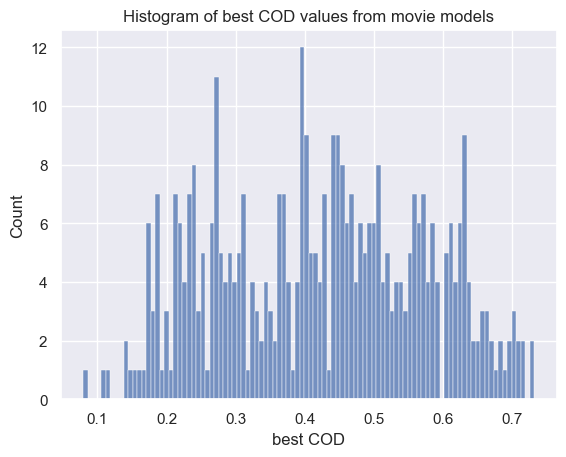

In [53]:
# bins=len(average_CODs)
# sns.histplot(average_CODs, bins=bins, label="HIST")
# plt.title('Histogram of average COD values from movie models')

# bins=len(best_CODs)-20
bins=100
# sns.histplot(best_CODs, bins=bins, label="HIST", stat='density')
sns.histplot(best_CODs, bins=bins, label="HIST")
plt.title('Histogram of best COD values from movie models')

plt.xlabel('best COD')
# plt.ylabel('count of rating')
# # plt.legend()
# # plt.ylim([0, 1])
plt.show()

In [54]:
# now, find the top ten CODs and which movies they are predicted for, and their COD

In [55]:
easiest = sorted(best_CODs, reverse=True)[:10]
easiest

[0.731507476731657,
 0.7315074767316568,
 0.7135542589926913,
 0.7135542589926913,
 0.7112222468014324,
 0.7112222468014324,
 0.7005689836445022,
 0.7005689836445022,
 0.7001881161214467,
 0.6927335239652475]

In [56]:
hardest = sorted(best_CODs)[:10]
hardest

[0.07948469093084642,
 0.11134259626426424,
 0.11708033979272647,
 0.141426437225317,
 0.1438868695548512,
 0.14851372649350136,
 0.15413567330482103,
 0.16016372820860814,
 0.168991422823908,
 0.17111918539600846]

In [57]:
# get the best predictors
print("best predictors:")
best_well_predicted = []
for i in range(len(best_data_all)):
    
    item = best_data_all[i]
    if item['cod'] in easiest:
        print(item)
        best_well_predicted.append(item)
        

best predictors:
{'movie': 'Erik the Viking (1989)', 'other_movie': 'I.Q. (1994)', 'cod': 0.7315074767316568}
{'movie': 'I.Q. (1994)', 'other_movie': 'Erik the Viking (1989)', 'cod': 0.731507476731657}
{'movie': 'The Bandit (1996)', 'other_movie': 'Best Laid Plans (1999)', 'cod': 0.7112222468014324}
{'movie': 'Best Laid Plans (1999)', 'other_movie': 'The Bandit (1996)', 'cod': 0.7112222468014324}
{'movie': 'Congo (1995)', 'other_movie': 'The Straight Story (1999)', 'cod': 0.7005689836445022}
{'movie': 'The Straight Story (1999)', 'other_movie': 'Congo (1995)', 'cod': 0.7005689836445022}
{'movie': 'Ran (1985)', 'other_movie': 'Heavy Traffic (1973)', 'cod': 0.6927335239652475}
{'movie': 'Heavy Traffic (1973)', 'other_movie': 'Ran (1985)', 'cod': 0.6927335239652475}
{'movie': 'The Final Conflict (1981)', 'other_movie': 'The Lookout (2007)', 'cod': 0.7001881161214467}
{'movie': 'The Lookout (2007)', 'other_movie': 'Patton (1970)', 'cod': 0.7135542589926913}
{'movie': 'Patton (1970)', 'othe

In [58]:
# get the worst predictors
print("worst predictors:")
least_well_predicted = []
for i in range(len(best_data_all)):
    
    item = best_data_all[i]
    if item['cod'] in hardest:
        print(item)
        least_well_predicted.append(item)

worst predictors:
{'movie': 'Black Swan (2010)', 'other_movie': 'Sorority Boys (2002)', 'cod': 0.11708033979272647}
{'movie': 'The Fast and the Furious (2001)', 'other_movie': 'Terminator 3: Rise of the Machines (2003)', 'cod': 0.168991422823908}
{'movie': '13 Going on 30 (2004)', 'other_movie': "Can't Hardly Wait (1998)", 'cod': 0.16016372820860814}
{'movie': 'Clueless (1995)', 'other_movie': 'Escape from LA (1996)', 'cod': 0.141426437225317}
{'movie': 'Avatar (2009)', 'other_movie': 'Bad Boys (1995)', 'cod': 0.07948469093084642}
{'movie': 'Interstellar (2014)', 'other_movie': 'Torque (2004)', 'cod': 0.11134259626426424}
{'movie': 'The Cabin in the Woods (2012)', 'other_movie': 'The Evil Dead (1981)', 'cod': 0.1438868695548512}
{'movie': 'Grown Ups 2 (2013)', 'other_movie': 'The Core (2003)', 'cod': 0.17111918539600846}
{'movie': 'Titanic (1997)', 'other_movie': 'Cocktail (1988)', 'cod': 0.15413567330482103}
{'movie': 'La La Land (2016)', 'other_movie': 'The Lookout (2007)', 'cod': 0.

In [60]:
df.columns

Index(['The Life of David Gale (2003)', 'Wing Commander (1999)',
       'Django Unchained (2012)', 'Alien (1979)',
       'Indiana Jones and the Last Crusade (1989)', 'Snatch (2000)',
       'Rambo: First Blood Part II (1985)', 'Fargo (1996)',
       'Let the Right One In (2008)', 'Black Swan (2010)',
       ...
       'When watching a movie I feel like the things on the screen are happening to me',
       'As a movie unfolds I start to have problems keeping track of events that happened earlier',
       'The emotions on the screen "rub off" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared',
       'When watching a movie I get completely immersed in the alternative reality of the film',
       'Movies change my position on social economic or political issues',
       'When watching movies things get so intense that I have to stop watching',
       'Gender identity (1 = female; 2 = male; 3 = self-described)',
       'Are 

## on to question 2

In [62]:
df[df.index.duplicated()]

,The Life of David Gale (2003),Wing Commander (1999),Django Unchained (2012),Alien (1979),Indiana Jones and the Last Crusade (1989),Snatch (2000),Rambo: First Blood Part II (1985),Fargo (1996),Let the Right One In (2008),Black Swan (2010),...,When watching a movie I feel like the things on the screen are happening to me,As a movie unfolds I start to have problems keeping track of events that happened earlier,"The emotions on the screen ""rub off"" on me - for instance if something sad is happening I get sad or if something frightening is happening I get scared",When watching a movie I get completely immersed in the alternative reality of the film,Movies change my position on social economic or political issues,When watching movies things get so intense that I have to stop watching,Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond),mean


In [109]:
# # multiple regression models for 10 best and 10 worst

# # start with one of them, one of the worst, just to see
# # transform it into the df he did in class/lab
# static_cols = ['Gender identity (1 = female; 2 = male; 3 = self-described)',
#         'Are you an only child? (1: Yes; 0: No; -1: Did not respond)',
#         'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']

# for item in least_well_predicted:
    
#     if item['movie'] == 'Black Swan (2010)':
#         print(True)
#         # then, get the data for this movie and the other movie
# #         movie = pd.to_numeric(df[worst_item['movie']],errors='coerce').values
# #         best_predictor_movie = pd.to_numeric(df[worst_item['other_movie']],errors='coerce').values
# #         gender_id = pd.to_numeric(df['Gender identity (1 = female; 2 = male; 3 = self-described)'],errors='coerce').values
# #         sibship = pd.to_numeric(df['Are you an only child? (1: Yes; 0: No; -1: Did not respond)'],errors='coerce').values
# #         social_viewing = pd.to_numeric(df['Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)'],errors='coerce').values
#         cols = []
#         cols.append(item['movie'])
#         cols.append(item['other_movie'])
#         cols.extend(static_cols)

#         movie_df = pd.DataFrame(df,columns=cols)
        

In [55]:
movie_df

,Black Swan (2010),Once Upon a Time in America (1984),Gender identity (1 = female; 2 = male; 3 = self-described),Are you an only child? (1: Yes; 0: No; -1: Did not respond),Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)
0,2.911262,2.604416,1.0,0,1
1,2.915378,2.608532,1.0,0,0
2,3.015878,2.709032,1.0,1,0
3,4.000000,2.542018,1.0,0,1
4,0.000000,2.452782,1.0,1,1
...,...,...,...,...,...
1092,3.057972,2.751126,1.0,0,0
1093,3.500000,3.000000,1.0,0,0
1094,3.052657,2.745811,1.0,0,0
1095,3.123214,2.816367,1.0,0,1


In [ ]:
#  multiple regression controls for all things at once. because, maybe people who have a higher IQ seek out more
#  years of education. this is why its so important and why multiple regression is powerful.

#so, let's build this thing, one feature at a time.

#### Let's build our model one feature at a time and note the $RMSE$ and $R^2$ each time.

In [58]:
dataframe_cols = movie_df.columns.tolist()

y = df[dataframe_cols[0]].to_numpy()      # the outcome we are trying to predict
x1 = df[dataframe_cols[1]].to_numpy()         # predictor variables which we will add one by one
x2 = df[dataframe_cols[2]].to_numpy()
x3 = df[dataframe_cols[3]].to_numpy()
x4 = df[dataframe_cols[4]].to_numpy()

# after adding a new feature, compute the RMSE and the R2 value to see how it changes

In [59]:
x4

array([1, 0, 0, ..., 0, 1, 1])

In [110]:
def get_multiple_regression(data_df):
    
    dataframe_cols = movie_df.columns.tolist()
    y = df[dataframe_cols[0]].to_numpy()      # the outcome we are trying to predict
    x1 = df[dataframe_cols[1]].to_numpy()         # predictor variables which we will add one by one
    x2 = df[dataframe_cols[2]].to_numpy()
    x3 = df[dataframe_cols[3]].to_numpy()
    x4 = df[dataframe_cols[4]].to_numpy()
    
    x = np.concatenate((x1.reshape(-1,1), x2.reshape(-1,1), x3.reshape(-1,1), x4.reshape(-1,1)), axis=1) 
    reg = LinearRegression().fit(x,y)
    y_hat = reg.predict(x)

#     plt.figure(figsize=(8,5))
#     plt.plot(y_hat, y, 'o', ms=2)
#     plt.xlabel('Prediction')
#     plt.ylabel('Actual')
#     plt.show()

    r2 = r2_score(y,y_hat)
    rmse = np.sqrt(np.mean(np.sum((y-y_hat)**2)))
    
#     print('R^2:', r2.round(3))
#     print('RMSE:', rmse.round(3))
    
    return r2

In [114]:
df = df.loc[:,~df.columns.duplicated()]

In [128]:
# multiple regression model, one cell for black swan all predictors
# will need to return this movie, its previous COD and its new COD after multiple regression
worst_scatterplot_data_x = []
worst_scatterplot_data_y = []

static_cols = ['Gender identity (1 = female; 2 = male; 3 = self-described)',
        'Are you an only child? (1: Yes; 0: No; -1: Did not respond)',
        'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']

for item in least_well_predicted:
    
    if True:
#     if item['movie'] == 'Black Swan (2010)':
# #         print("movie: %s, previous r2: %s" % (item['movie'], item['cod']))
        movie = item['movie']
        prev_cod = item['cod']
        cols = []
        cols.append(movie)
        cols.append(item['other_movie'])
        cols.extend(static_cols)

        movie_df = pd.DataFrame(df,columns=cols)
        new_cod = get_multiple_regression(movie_df)
        print("%s & %.4f & %.4f & %.5f" % (movie, prev_cod, new_cod,(new_cod-prev_cod) ))
#         print("\t delta: %s" % (new_cod-prev_cod))
        
        worst_scatterplot_data_x.append(prev_cod)
        worst_scatterplot_data_y.append(new_cod)

Black Swan (2010) & 0.1171 & 0.1181 & 0.00106
The Fast and the Furious (2001) & 0.1690 & 0.1736 & 0.00457
13 Going on 30 (2004) & 0.1602 & 0.1674 & 0.00723
Clueless (1995) & 0.1414 & 0.1484 & 0.00693
Avatar (2009) & 0.0795 & 0.0818 & 0.00227
Interstellar (2014) & 0.1113 & 0.1165 & 0.00514
The Cabin in the Woods (2012) & 0.1439 & 0.1517 & 0.00786
Grown Ups 2 (2013) & 0.1711 & 0.1796 & 0.00852
Titanic (1997) & 0.1541 & 0.1585 & 0.00433
La La Land (2016) & 0.1485 & 0.1515 & 0.00298


In [129]:
# now lets do it for the best movies
# multiple regression model, one cell for black swan all predictors
# will need to return this movie, its previous COD and its new COD after multiple regression
best_scatterplot_data_x = []
best_scatterplot_data_y = []

static_cols = ['Gender identity (1 = female; 2 = male; 3 = self-described)',
        'Are you an only child? (1: Yes; 0: No; -1: Did not respond)',
        'Movies are best enjoyed alone (1: Yes; 0: No; -1: Did not respond)']

for item in best_well_predicted:
    movie = item['movie']
    prev_cod = item['cod']
    
    cols = []
    cols.append(movie)
    cols.append(item['other_movie'])
    cols.extend(static_cols)

    movie_df = pd.DataFrame(df,columns=cols)
    new_cod = get_multiple_regression(movie_df)
    print("%s & %.4f & %.4f & %.5f" % (movie, prev_cod, new_cod,(new_cod-prev_cod) ))
#     print("\t delta: %s" % (new_cod-prev_cod))
    best_scatterplot_data_x.append(prev_cod)
    best_scatterplot_data_y.append(new_cod)

Erik the Viking (1989) & 0.7315 & 0.7328 & 0.00130
I.Q. (1994) & 0.7315 & 0.7319 & 0.00042
The Bandit (1996) & 0.7112 & 0.7128 & 0.00159
Best Laid Plans (1999) & 0.7112 & 0.7126 & 0.00135
Congo (1995) & 0.7006 & 0.7006 & 0.00005
The Straight Story (1999) & 0.7006 & 0.7014 & 0.00085
Ran (1985) & 0.6927 & 0.6931 & 0.00037
Heavy Traffic (1973) & 0.6927 & 0.6932 & 0.00049
The Final Conflict (1981) & 0.7002 & 0.7019 & 0.00175
The Lookout (2007) & 0.7136 & 0.7150 & 0.00140
Patton (1970) & 0.7136 & 0.7146 & 0.00108


0.9929866144022591 0.005981225810151032


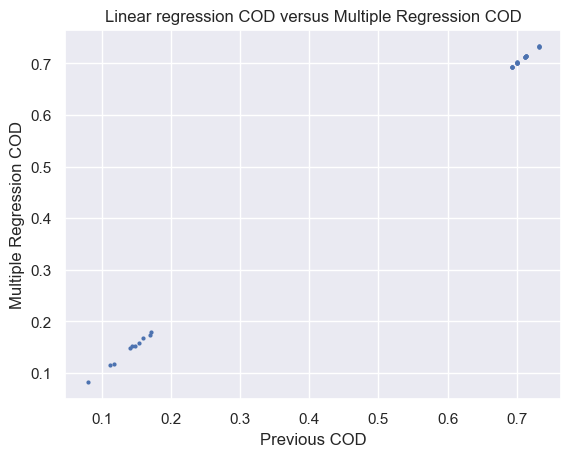

In [118]:
x = worst_scatterplot_data_x
y = worst_scatterplot_data_y
x.extend(best_scatterplot_data_x)
y.extend(best_scatterplot_data_y)


a,b = np.polyfit(x, y, 1)   # a is regression coeffient (slope) and b is the intercept
print(a,b)

plt.plot(x,y, 'o', ms=2)     # scatter plot, marker size=2 (visual pref)
# plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title("Linear regression COD versus Multiple Regression COD")
plt.xlabel('Previous COD')
plt.ylabel('Multiple Regression COD')
plt.show()

In [112]:
# best_scatterplot_data_x

NameError: name 'best_scatterplot_data_x' is not defined

1.004062180954915 -0.001702604201887676


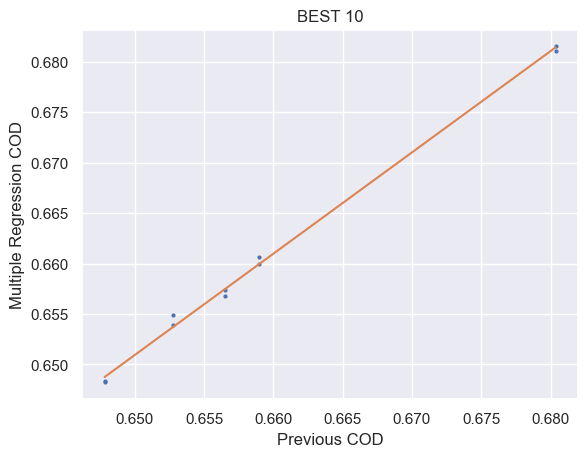

In [98]:
x = best_scatterplot_data_x
y = best_scatterplot_data_y


a,b = np.polyfit(x, y, 1)   # a is regression coeffient (slope) and b is the intercept
print(a,b)

plt.plot(x,y, 'o', ms=2)     # scatter plot, marker size=2 (visual pref)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.title("BEST 10")
plt.xlabel('Previous COD')
plt.ylabel('Multiple Regression COD')
plt.show()

In [ ]:
# in both cases we see that the slope is slightly more than 1, and therefore we know that adding more predictors
# made our model a little bit better, but MLR made slightly more of an impact for the 10 least easily predicted movies.
# adding predictors explains slightly more of the variance, but not really.
# explain what is an r2 value. explanation of the variance.









## Awesome, done with Q2.

In [99]:
print(len(best_scatterplot_data_x))

10


In [100]:
print(len(worst_scatterplot_data_x))

10
